In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/samsung-electronics-stock-price-2000-2024/samsung dataset.csv


# **Import**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# **1. Data Import & Structure**

In [3]:
df = pd.read_csv('/kaggle/input/samsung-electronics-stock-price-2000-2024/samsung dataset.csv', delimiter=';')

* **Date: The date of the trading session.**
* **Open: The opening price of Samsung Electronics stock at the beginning of the trading session.**
* **High: The highest price reached by the stock during the trading session.**
* **Low: The lowest price reached by the stock during the trading session.**
* **Close: The closing price of Samsung Electronics stock at the end of the trading session.**
* **Adj Close: The adjusted closing price, which accounts for any corporate actions or other adjustments affecting the stock price.**
* **Volume: The total number of shares traded during the trading session.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6056 entries, 0 to 6055
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       6056 non-null   object
 1   Open       6056 non-null   int64 
 2   High       6056 non-null   int64 
 3   Low        6056 non-null   int64 
 4   Close      6056 non-null   int64 
 5   Adj Close  6056 non-null   object
 6   Volume     6056 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 331.3+ KB


In [5]:
df.shape

(6056, 7)

In [6]:
df.describe()

,Open,High,Low,Close,Volume
count,6.056000e+03,6.056000e+03,6.056000e+03,6.056000e+03,6.056000e+03
mean,2.309685e+10,2.332990e+10,2.285867e+10,2.309259e+10,2.116822e+07
std,2.041034e+10,2.058240e+10,2.023077e+10,2.039702e+10,1.512332e+07
min,5.230000e+05,5.360000e+05,5.180000e+05,5.260000e+05,0.000000e+00
25%,8.840000e+09,8.947500e+09,8.730000e+09,8.850000e+09,1.164855e+07
50%,1.533000e+10,1.551000e+10,1.516000e+10,1.533000e+10,1.708868e+07
75%,2.986000e+10,3.004000e+10,2.958000e+10,2.984000e+10,2.621072e+07
max,9.030000e+10,9.680000e+10,8.950000e+10,9.100000e+10,1.642150e+08


**Missing Value Check**

In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# **2. Data Transform**

In [8]:
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [9]:
df = df.rename(columns = {'Adj Close': 'Adj'})
df['Adj'] = pd.to_numeric(df['Adj'], errors='coerce')

**Data Check**

In [10]:
df.head(3)

,Date,Open,High,Low,Close,Adj,Volume,Year,Month,Day
0,2000-01-04,6000000000,6110000000,5660000000,6110000000,4.651738e+09,74195000,2000,1,4
1,2000-01-05,5800000000,6060000000,5520000000,5580000000,4.248232e+09,74680000,2000,1,5
2,2000-01-06,5750000000,5780000000,5580000000,5620000000,4.278687e+09,54390000,2000,1,6


# **3. Data Visualization**

In [11]:
num_cols = df.select_dtypes(include = ['int64','float64']).columns

**Histogram**

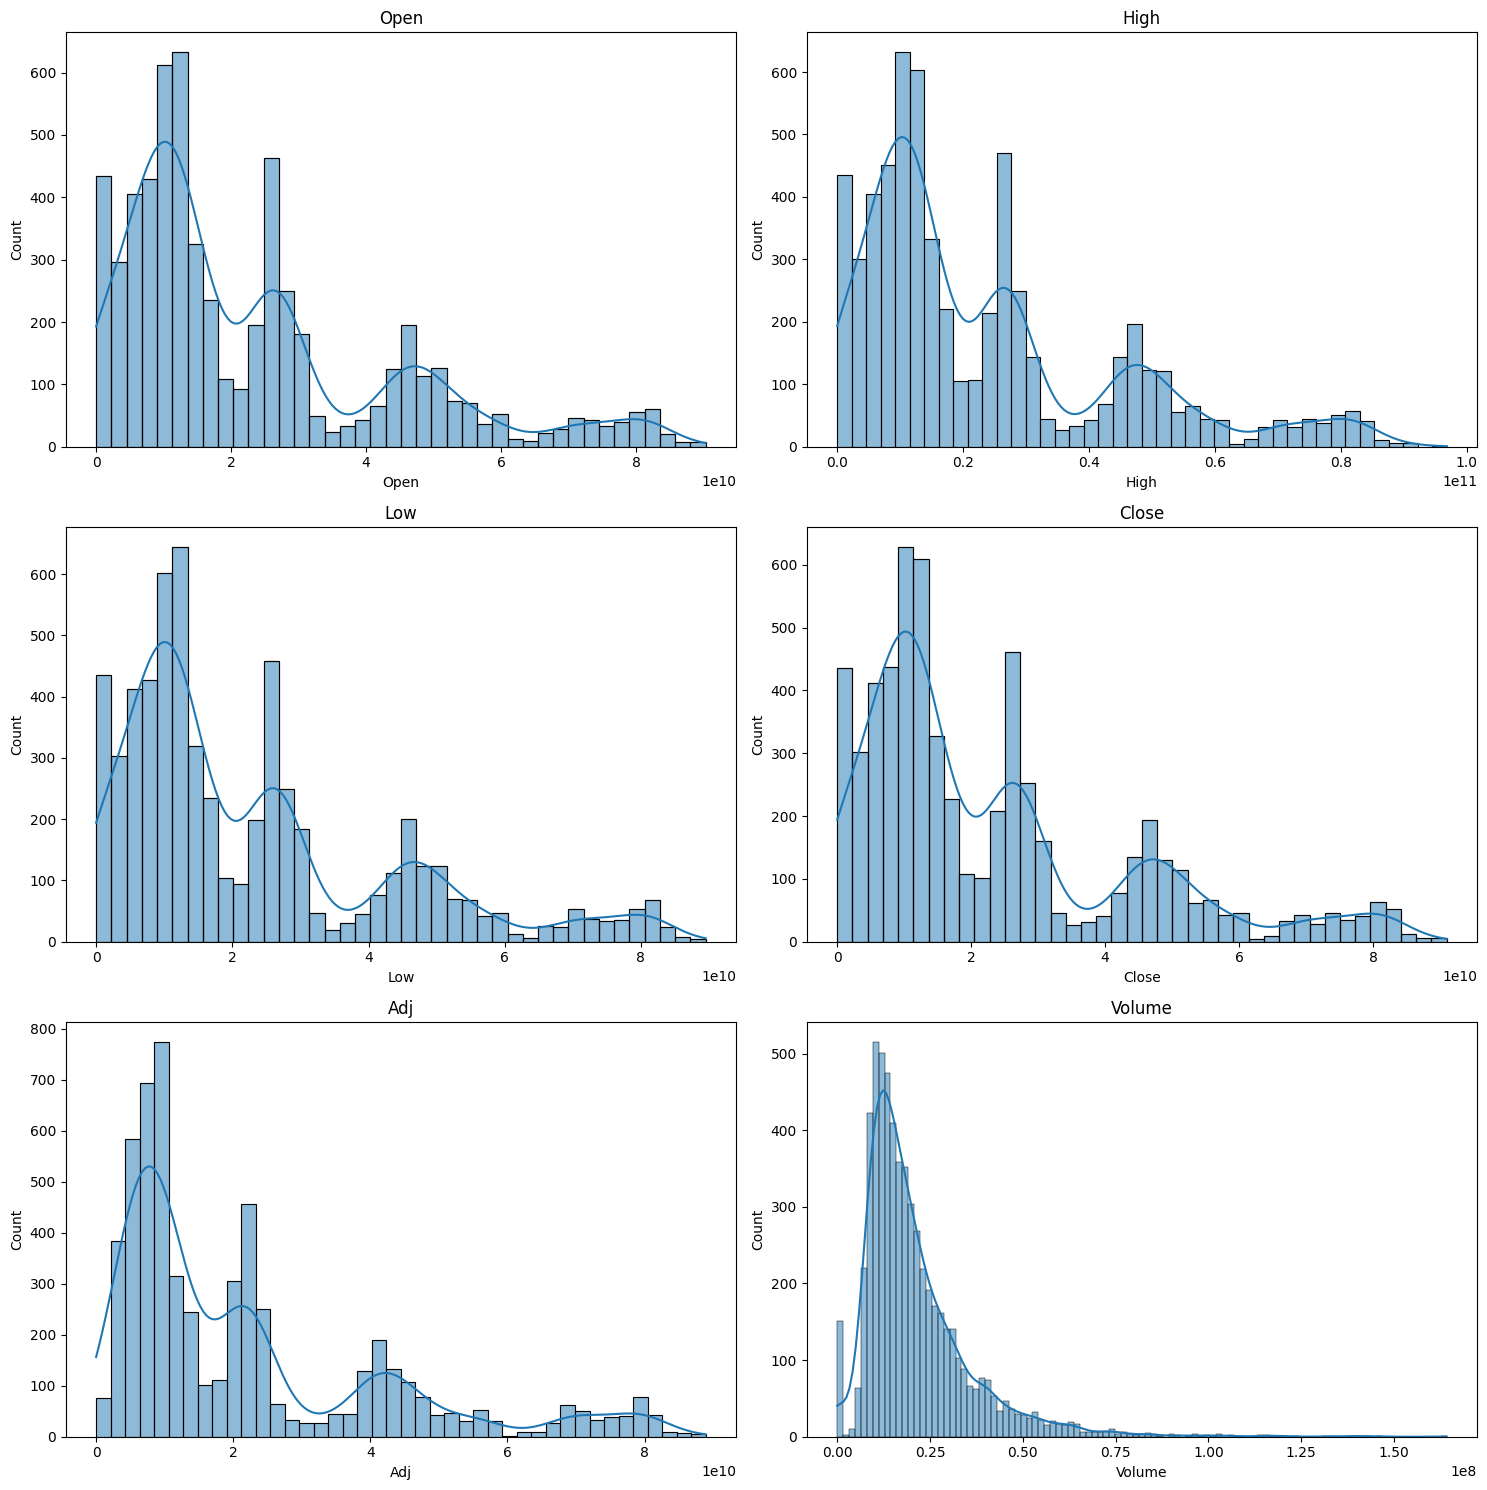

In [12]:
f, ax = plt.subplots(3,2, figsize=(15, 15))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data= df, x= cols, ax = ax[index],kde=True)
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show()   

-------------------

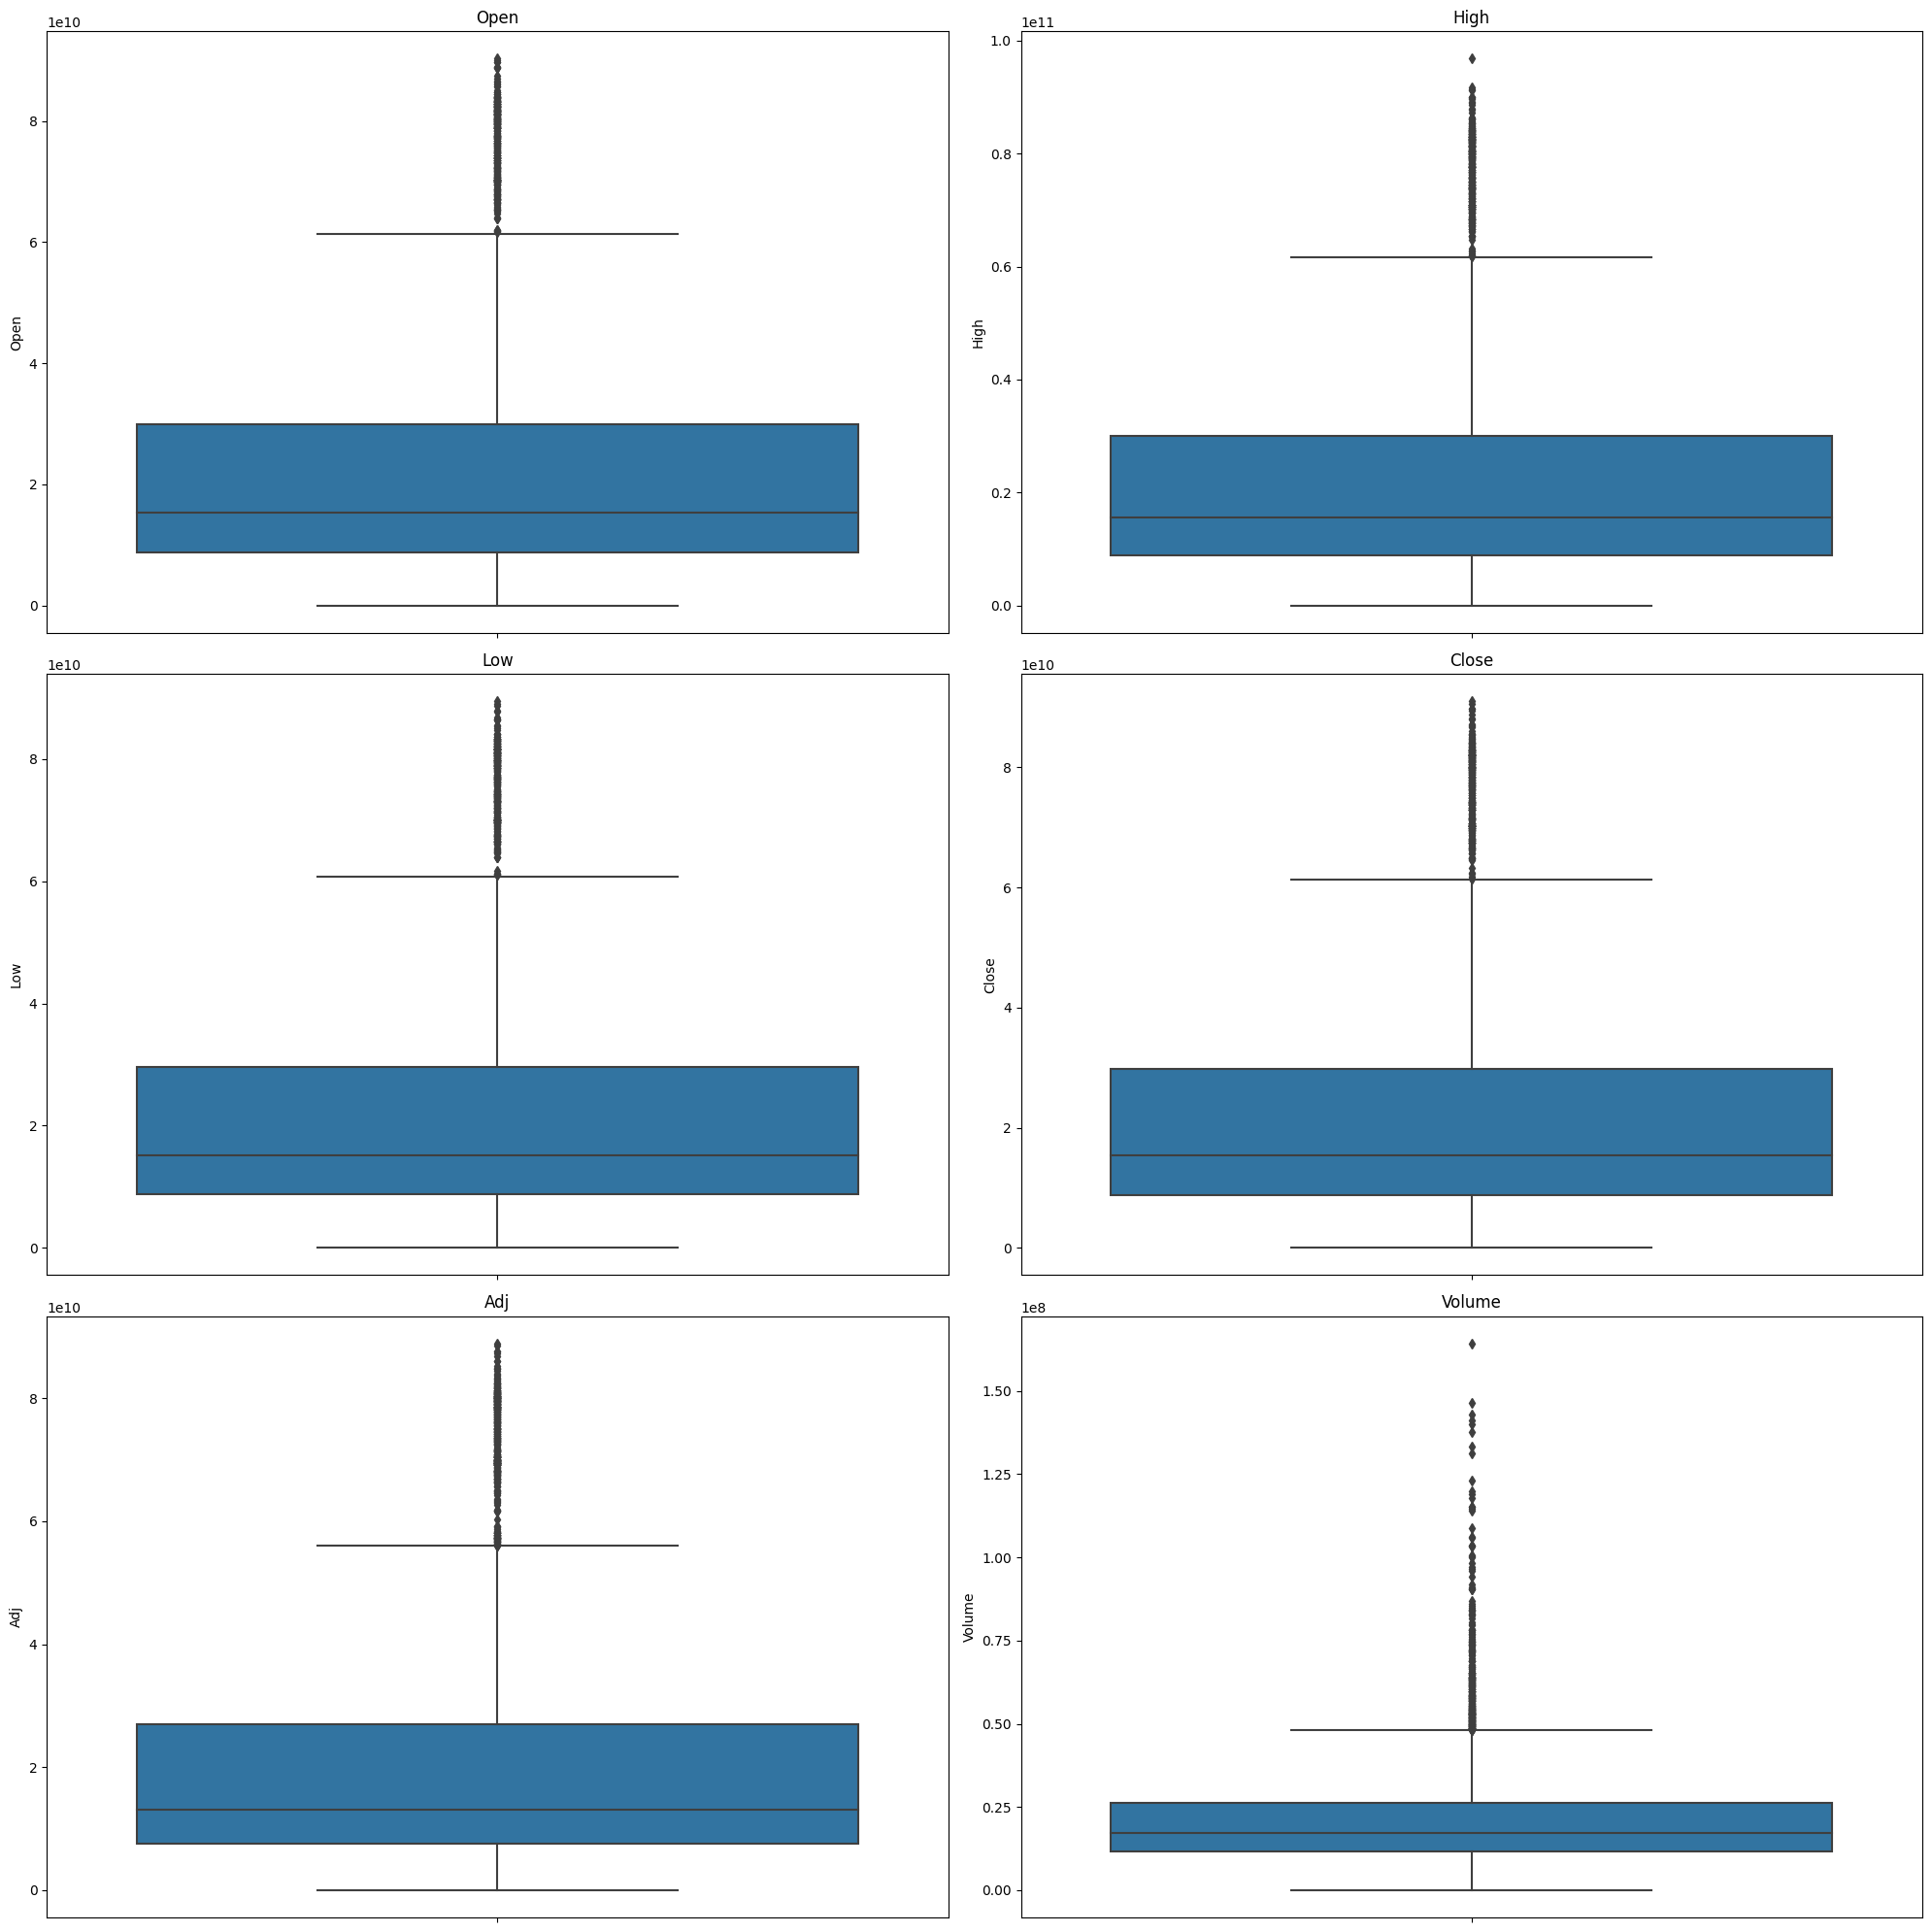

In [13]:
f, ax = plt.subplots(3,2, figsize=(20, 20))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.boxplot(data= df, y = cols, ax = ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show() 

----------

**Changes in highest Price**

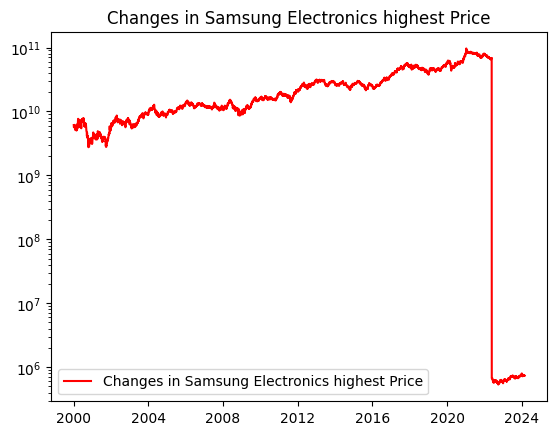

In [14]:
plt.plot(df['Date'], df['High'], label = 'Changes in Samsung Electronics highest Price',color = 'red')
plt.title('Changes in Samsung Electronics highest Price')
plt.yscale('log')
plt.legend()
plt.show()

**show a steady increase**

-----------

**Changes in Volume**

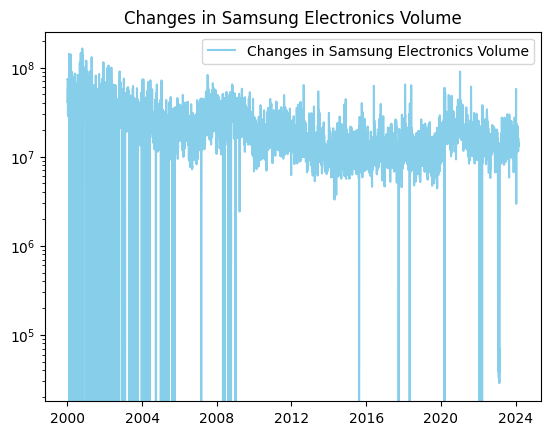

In [15]:
plt.plot(df['Date'], df['Volume'], label = 'Changes in Samsung Electronics Volume',color = 'skyblue')
plt.title('Changes in Samsung Electronics Volume')
plt.yscale('log')
plt.legend()
plt.show()

------------

**Changes in Rolling of highest price(30 Days)**

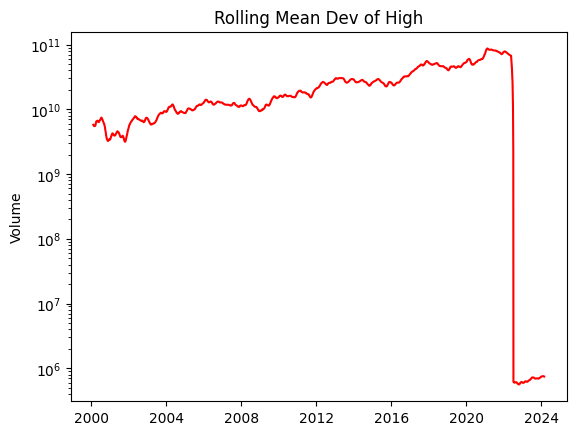

In [16]:
df2 = df.copy() 

if 'Date' in df2.columns:
    df2['Date'] = pd.to_datetime(df2['Date'])
    df2.set_index('Date', inplace=True)

df2['Rolling Mean Dev of High'] = df2['High'].rolling(window=30).mean()

plt.plot(df2['Rolling Mean Dev of High'], label='30-Day Rolling Mean Dev of High',color = 'red')
plt.yscale('log')
plt.title('Rolling Mean Dev of High')
plt.ylabel('Volume')
plt.show() 

------------

**Changes in  Rolling of total number of trading shares(30 Days)**

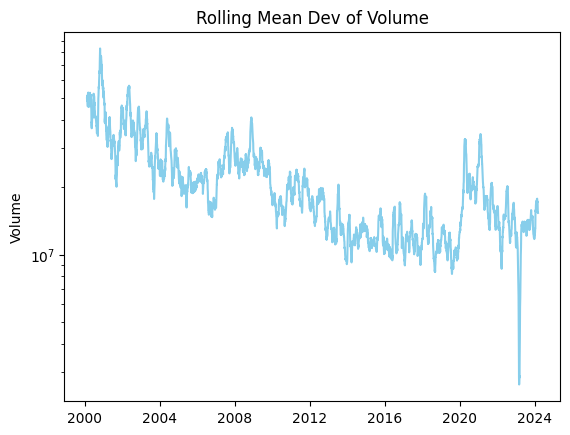

In [17]:
df2 = df.copy() 

if 'Date' in df2.columns:
    df2['Date'] = pd.to_datetime(df2['Date'])
    df2.set_index('Date', inplace=True)

df2['Rolling Mean Dev of Volume'] = df2['Volume'].rolling(window=30).mean()

plt.plot(df2['Rolling Mean Dev of Volume'], label='30-Day Rolling Mean Dev of Volume',color = 'skyblue')
plt.yscale('log')
plt.title('Rolling Mean Dev of Volume')
plt.ylabel('Volume')
plt.show() 

-----------

**Change Volume by Year**

In [18]:
df_year = df.groupby('Year').mean()

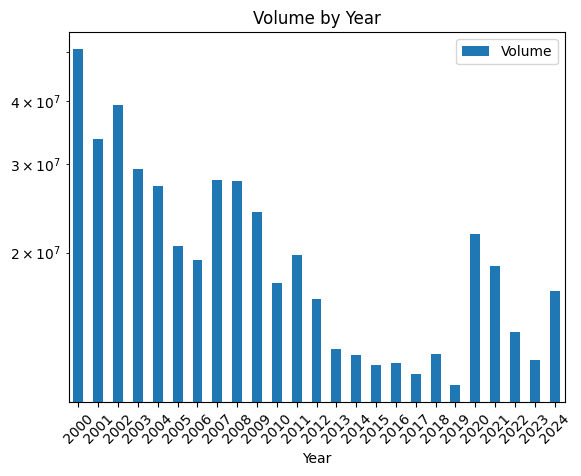

In [50]:
df_year.plot(kind='bar', y=['Volume'], rot=45, title='Volume by Year')
plt.yscale('log')
plt.show()

----------

**Correlation Hitmap**

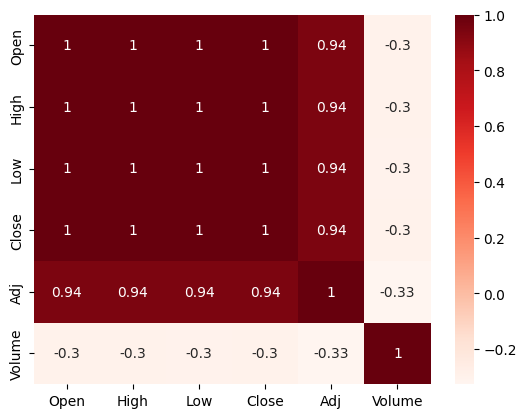

In [20]:
sns.heatmap(df[num_cols].corr(),annot=True,cmap='Reds')
plt.show()

------------

# **4.Modeling**

**Use regression to predict**

**Import**

In [21]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [22]:
df = df.dropna()

In [38]:
X = df[['Open', 'High', 'Low', 'Adj','Volume']]
Y = df['Close']

In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [40]:
RF = RandomForestRegressor(random_state=42)

In [41]:
RF.fit(X_train,Y_train)

RandomForestRegressor(random_state=42)

In [42]:
pred_RF = RF.predict(X_test)

In [43]:
print(f'MAE : {mean_absolute_error(Y_test,pred_RF)}')
print(f'MSE : {mean_squared_error(Y_test,pred_RF)}')
print(f'r2_score : {r2_score(Y_test,pred_RF)}')

MAE : 102156959.53367876
MSE : 3.3349634612457784e+16
r2_score : 0.9999214258302094


------------------------------

In [44]:
LR = LinearRegression()

In [45]:
LR.fit(X_train,Y_train)

LinearRegression()

In [46]:
pred_LR = LR.predict(X_test)

In [47]:
print(f'MAE : {mean_absolute_error(Y_test,pred_LR)}')
print(f'MSE : {mean_squared_error(Y_test,pred_LR)}')
print(f'r2_score : {r2_score(Y_test,pred_LR)}')

MAE : 118424688.42308637
MSE : 3.374061705475828e+16
r2_score : 0.999920504647079


-------------------

# **5.Evaluation**

**Random Forest is a better model. Because MAE, MSE are small.**

----------------

**Please leave your advice in the comments. Thank you**